In [39]:
import numpy as np
import pandas as pd
from os import walk
import tensorflow as tf


# For data cleaning
from utils import create_imdb_csv_dataset, word_count, data_processing
from collections import Counter

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Convert train and test datasets to csv files

In [ ]:
pth = './Dataset/aclImdb/train'
export_train = './Dataset/original/train.csv'
export_test = './Dataset/original/test.csv'

df_train = create_imdb_csv_dataset(pth,export_train)
df_test = create_imdb_csv_dataset(pth,export_test)

# Data Exploration

We will start by looking to the class distribution of data

Text(0.5, 1.0, 'Training Dataset Sentiment Distribution')

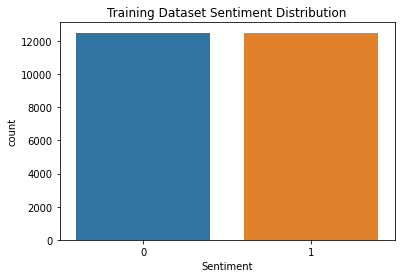

In [9]:
sns.countplot(x='Sentiment', data=df_train)
plt.title("Training Dataset Sentiment Distribution")

Text(0.5, 1.0, 'Test Dataset Sentiment Distribution')

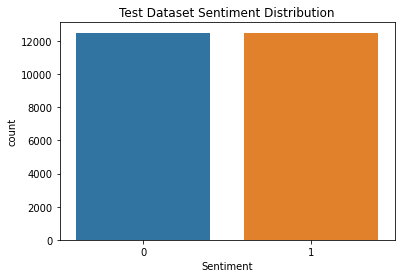

In [51]:
sns.countplot(x='Sentiment', data=df_test)
plt.title("Test Dataset Sentiment Distribution")

#### Note:
Both distributions are balanced

## Data Cleaning

In the next steps we will clean the data to ensure keeping only relevent features. 
We will start by removing all sort of punctuations
We will plot the word count to see if there is any correlation between the size of the review and its class

We will then try reducing the data (data_processing method) by:
- Removing links and urls, html tags
- Perform Text Lemmatization to only keep the lexical root of words
- We will not use  Text Stemming since Lemmatization is better than this one.

In [11]:
df_train['word count'] = df_train['Review'].apply(word_count)
df_test['word count'] = df_test['Review'].apply(word_count)

In [12]:
df_train.head()

,Review,Sentiment,word count
0,When I remember seeing the previews for this m...,1,429
1,A couple of farmers struggle in life in a smal...,0,200
2,I looked over the other comments and was thoro...,0,122
3,Is there any other time period that has been s...,0,443
4,Though the pieces are uneven this collection o...,1,168


In [13]:
df_test.head()

,Review,Sentiment,word count
0,This one hearkens back to the days of the mati...,0,204
1,With the MASSIVE advertising this is getting o...,0,207
2,I really enjoyed this movie. The script is fre...,1,42
3,This film has good characters with excellent p...,1,41
4,"I don't know if this is a sitcom or not, but I...",1,151


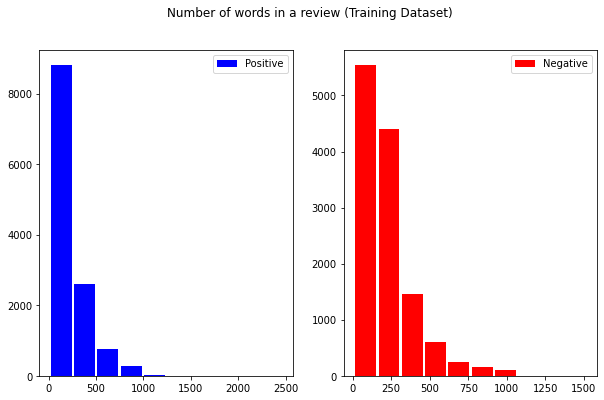

In [61]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df_train[df_train['Sentiment'] == 1]['word count'], label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df_train[df_train['Sentiment'] == 0]['word count'], label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in a review (Training Dataset)")
plt.show()

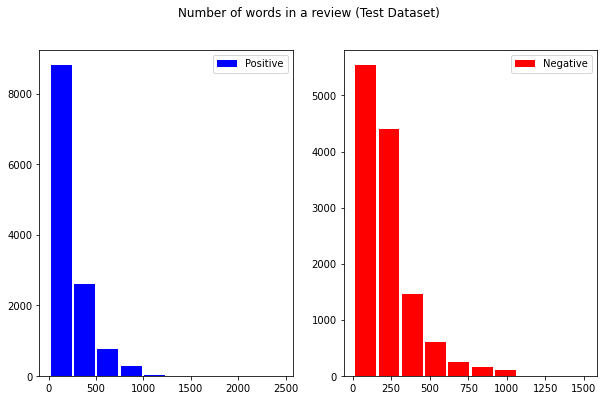

In [63]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
ax[0].hist(df_test[df_test['Sentiment'] == 1]['word count'], label='Positive', color='blue', rwidth=0.9)
ax[0].legend(loc='upper right')
ax[1].hist(df_test[df_test['Sentiment'] == 0]['word count'], label='Negative', color='red', rwidth=0.9)
ax[1].legend(loc='upper right')
fig.suptitle("Number of words in a review (Test Dataset)")
plt.show()

In [23]:
df_train.Review = df_train['Review'].apply(data_processing)
df_test.Review = df_test['Review'].apply(data_processing)

### Remove duplicates

In [24]:
duplicated_count = df_train.duplicated().sum()
print("Number of duplicate entries: ", duplicated_count)

Number of duplicate entries:  97


In [68]:
duplicated_count = df_test.duplicated().sum()
print("Number of duplicate entries on test dataset: ", duplicated_count)

Number of duplicate entries on test dataset:  97


In [69]:
df_train = df_train.drop_duplicates('Review')
df_test = df_test.drop_duplicates('Review')

In [28]:
df_train['word count'] = df_train['Review'].apply(word_count)
df_train.head()

,Review,Sentiment,word count
0,remember seeing preview movie really thinking ...,1,222
1,couple farmer struggle life small village chin...,0,113
2,looked comment thoroughly amused find clearly ...,0,62
3,time period exhaustively covered television me...,0,242
4,though piece uneven collection 11 short film t...,1,78


### Save cleaned Data

In [67]:
df_train.to_csv('./Dataset/clean/cleaned_train_set.csv',index=False)

In [71]:
df_test.drop(columns="word count",inplace=True)
df_test.to_csv('./Dataset/clean/cleaned_test_set.csv',index=False)

### Comparision between longuest reviews

In [36]:
pos_reviews = df_train[df_train["Sentiment"] == 1]
pos_reviews.sort_values(by="word count",ascending=False).head()

,Review,Sentiment,word count
16563,match 1 tag team table match bubba ray spike d...,1,1429
17822,titanic directed james cameron present fiction...,1,927
24104,attention spoilersfirst let say rob roy one be...,1,918
16807,youve probably heard bit new disney dub miyaza...,1,891
16238,spoiler begin let say advantage seeing movie b...,1,812


In [37]:
neg_reviews = df_train[df_train["Sentiment"] == 0]
neg_reviews.sort_values(by="word count",ascending=False).head()

,Review,Sentiment,word count
4374,praised _atlantis_the_lost_empire_ disney adve...,0,809
22776,praised atlantisthe lost empire disney adventu...,0,787
2079,warning review contains plot spoiler though no...,0,738
14220,movie recently released dvd u finally got chan...,0,696
22354,raising victor vargas reviewyou know raising v...,0,688


#### Note: 
Positive reviews are longer than negative reviews

## Most Common words in positive reviews

In [43]:
count = Counter()
for text in pos_reviews['Review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(20)

[('film', 23825),
 ('movie', 21754),
 ('one', 13484),
 ('like', 8902),
 ('time', 7737),
 ('good', 7398),
 ('story', 7178),
 ('character', 6855),
 ('great', 6262),
 ('see', 6159),
 ('get', 5708),
 ('well', 5558),
 ('make', 5555),
 ('really', 5428),
 ('also', 5417),
 ('would', 5279),
 ('scene', 4810),
 ('even', 4807),
 ('show', 4731),
 ('life', 4694)]

In [44]:
pos_words = pd.DataFrame(count.most_common(20))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,23825
1,movie,21754
2,one,13484
3,like,8902
4,time,7737


Text(0.5, 1.0, 'Most Common words in Positive reviews')

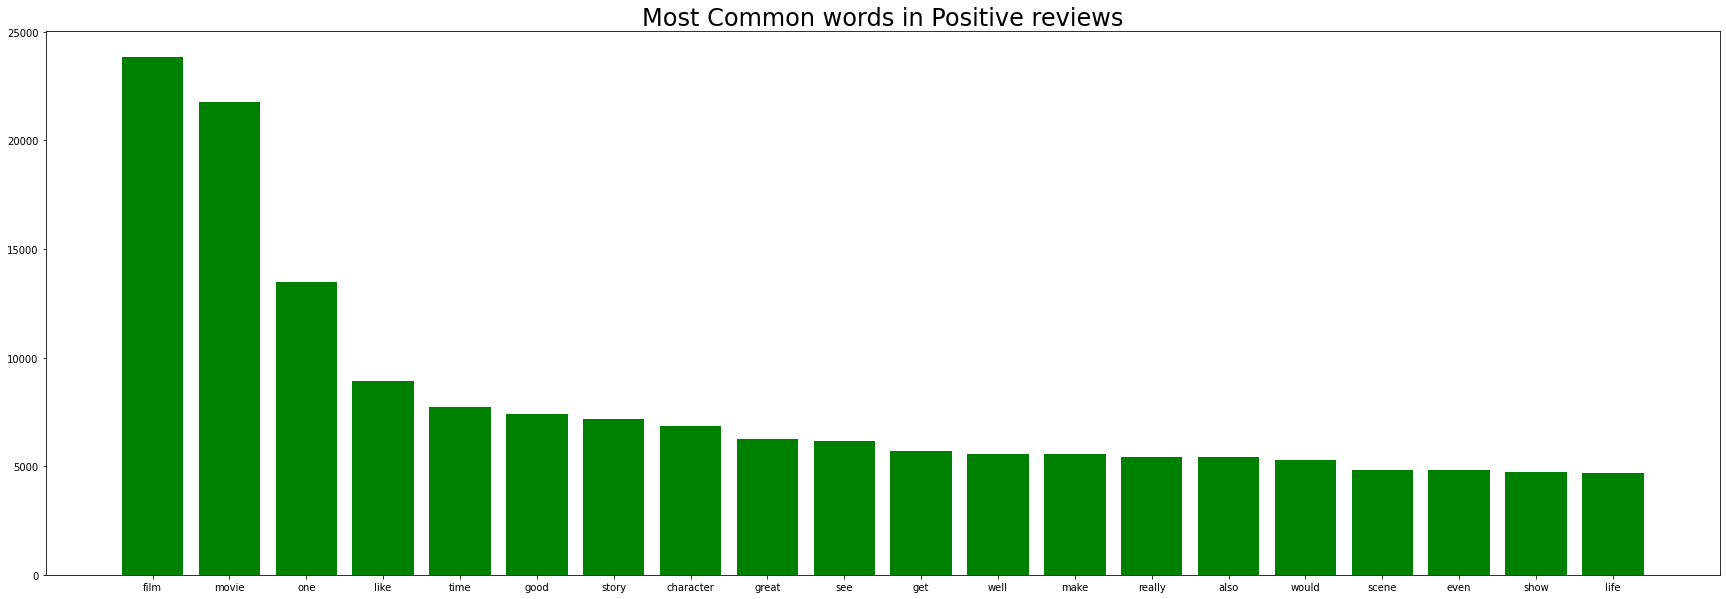

In [66]:
fig,axe = plt.subplots(1,1,figsize=(30,10))
axe.bar(pos_words.word,pos_words["count"],color="green")
axe.set_title("Most Common words in Positive reviews",fontdict={"size":24})

## Most Common words in negative reviews

In [56]:
count = Counter()
for text in neg_reviews['Review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(20)

[('movie', 27659),
 ('film', 21245),
 ('one', 12739),
 ('like', 11062),
 ('even', 7476),
 ('good', 7127),
 ('time', 7059),
 ('bad', 7030),
 ('character', 6894),
 ('would', 6807),
 ('get', 6665),
 ('make', 6320),
 ('really', 6172),
 ('see', 5514),
 ('scene', 5397),
 ('story', 5395),
 ('dont', 5009),
 ('much', 4940),
 ('people', 4704),
 ('thing', 4556)]

In [57]:
neg_words = pd.DataFrame(count.most_common(20))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,27659
1,film,21245
2,one,12739
3,like,11062
4,even,7476


Text(0.5, 1.0, 'Most Common words in Negative reviews')

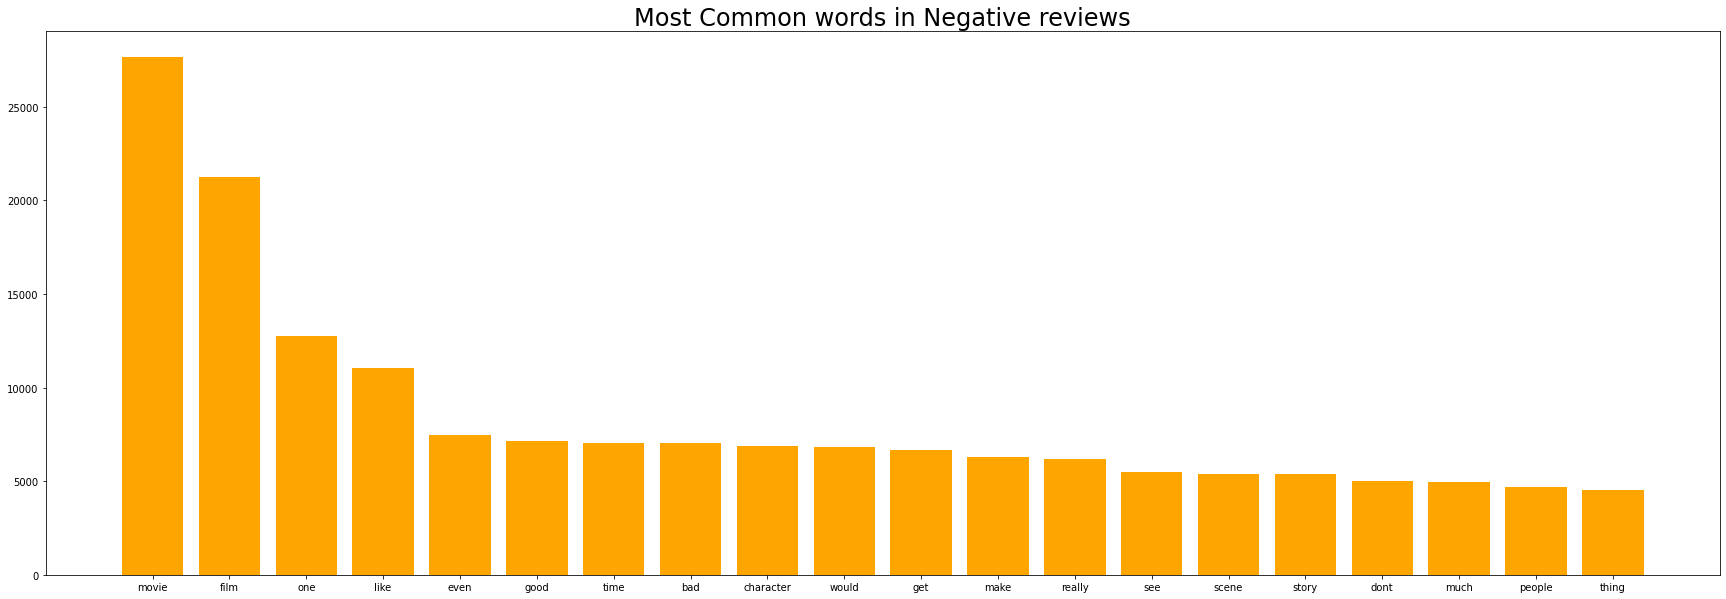

In [65]:
fig,axe = plt.subplots(1,1,figsize=(30,10))
axe.bar(neg_words.word,neg_words["count"], color="orange")
axe.set_title("Most Common words in Negative reviews",fontdict={"size":24})